<a href="https://colab.research.google.com/github/pknemi/feature-engineering/blob/main/feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [11]:
df=pd.read_csv('/content/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [12]:
 df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='Malic acid', ylabel='Density'>

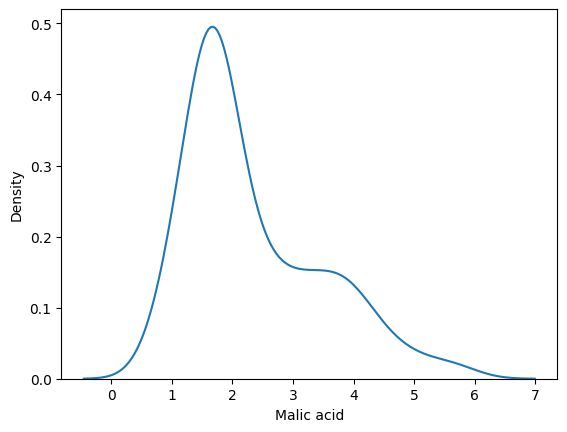

In [20]:
sns.kdeplot(df['Malic acid'])
#

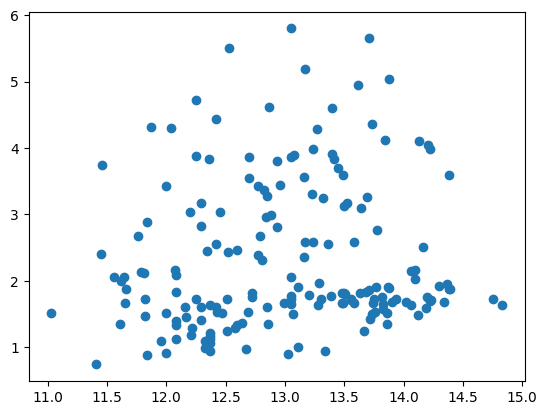

In [21]:
plt.scatter(df['Alcohol'],df['Malic acid'])
#

In [22]:
import sklearn
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.2,random_state=123,stratify=df['Class label'])
#

In [24]:
X_train.shape,X_test.shape
#

((142, 2), (36, 2))

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scalar=MinMaxScaler()
scalar.fit(X_train)
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [26]:
X_train

,Alcohol,Malic acid
30,13.73,1.50
11,14.12,1.48
167,12.82,3.37
62,13.67,1.25
13,14.75,1.73
...,...,...
59,12.37,0.94
106,12.25,1.73
12,13.75,1.73
48,14.10,2.02


In [34]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=['Alcohol','Malic acid'])
X_test_scaled=pd.DataFrame(X_test_scaled,columns=['Alcohol','Malic acid'])

In [35]:
  X_test_scaled

,Alcohol,Malic acid
0,0.360947,0.016327
1,0.505917,0.297959
2,-0.011834,-0.032653
3,0.334320,0.079592
4,0.369822,0.540816
5,0.816568,0.640816
6,0.263314,0.316327
7,0.227811,0.079592
8,0.455621,0.157143
9,0.609467,0.183673


Text(0.5, 1.0, 'After Scaling')

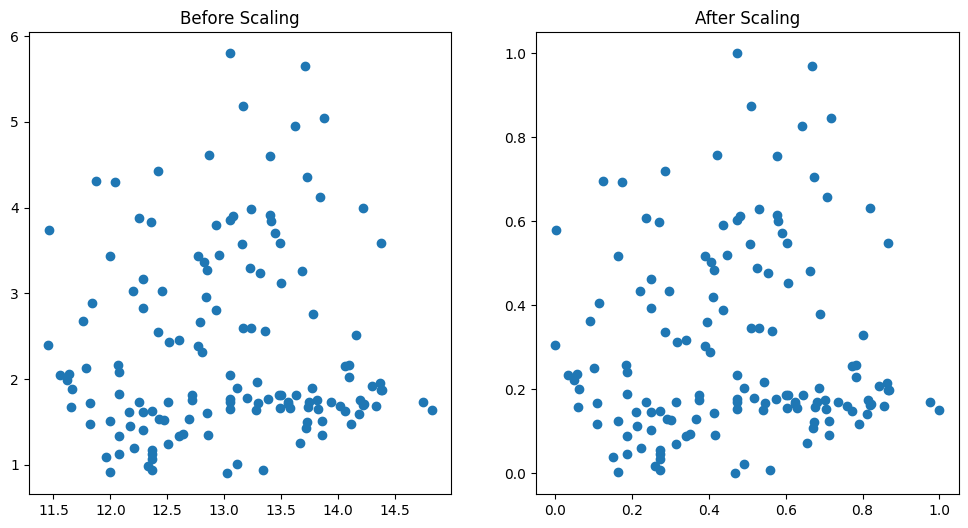

In [37]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,6))

# Access X_train columns using their names for the first scatter plot
ax1.scatter(X_train['Alcohol'],X_train['Malic acid'])
ax1.set_title('Before Scaling')

# Access X_train_scaled using numerical indices for the second scatter plot
# Assuming 'Alcohol' is the first column (index 0) and 'Malic acid' is the second (index 1)
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'])
ax2.set_title('After Scaling')

Text(0.5, 1.0, 'Malic acid After Scaling')

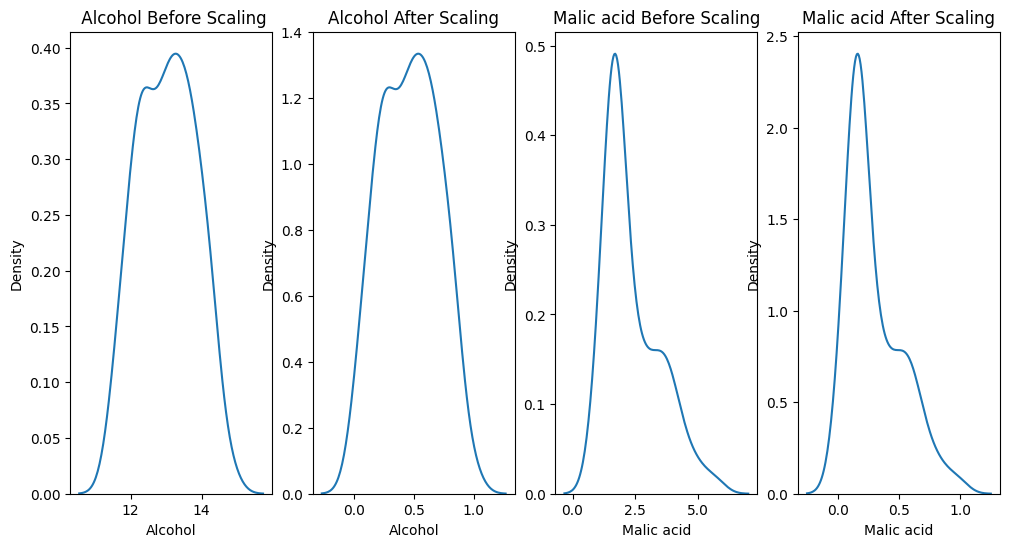

In [41]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,figsize=(12,6))
# Pass the DataFrame and specify 'x' and 'y' columns for kdeplot
sns.kdeplot(x=X_train['Alcohol'], ax=ax1) # Specify ax=ax1 to plot on the first subplot
ax1.set_title(' Alcohol Before Scaling')
sns.kdeplot(x=X_train_scaled['Alcohol'], ax=ax2) # Specify ax=ax2 to plot on the second subplot
ax2.set_title('Alcohol After Scaling')
sns.kdeplot(x=X_train['Malic acid'], ax=ax3) # Specify ax=ax3 to plot on the third subplot
ax3.set_title('Malic acid Before Scaling')
sns.kdeplot(x=X_train_scaled['Malic acid'], ax=ax4) # Specify ax=ax4 to plot on the fourth subplot
ax4.set_title('Malic acid After Scaling')